## Plots for AICCA analysis

In [1]:
using Plots; gr(); theme(:juno) 
using CSV, DataFrames, DataFramesMeta, Dates
using Statistics

In [ ]:
# Load in the data
root = "data/processed/subtrop/"
fl = filter( !contains(".DS"), readdir(root) )
df = DataFrame()
for i in fl append!( df, CSV.read( joinpath(root, i), dateformat="yyyy-mm-dd HH:MM:SS", DataFrame ) ) end
df.lat = floor.(df.lat);  df.lon = floor.(df.lon)
@select! df :Timestamp :lat :lon :Label 
df = @orderby df :Timestamp
CSV.write("data/processed/all_subtropic_label_only.csv", df, index = false)

In [ ]:
df = CSV.read( "data/processed/all_subtropic_label_only.csv", dateformat="yyyy-mm-dd HH:MM:SS", DataFrame )

In [ ]:
dft = @chain df begin
    @transform :day=Dates.Date.(:Timestamp)
    @by [:lat, :lon, day] :class = first(:Label) :nextclass = last(:Label) :day_num=size(:Label)[1]
    @subset :day_num .> 1
end;

In [35]:
temp = @subset dft :class .== 0

,lat,lon,day,class,nextclass,day_num
,Float64,Float64,Date,Int64,Int64,Int64
1,-18.0,118.0,2003-01-01,0,0,2
2,15.0,111.0,2003-01-01,0,36,2
3,0.0,106.0,2003-01-01,0,26,2
4,-12.0,108.0,2003-01-01,0,19,2
5,-13.0,107.0,2003-01-01,0,0,2
6,-15.0,105.0,2003-01-01,0,0,2
7,-16.0,105.0,2003-01-01,0,0,2
8,-18.0,110.0,2003-01-01,0,0,2
9,-22.0,106.0,2003-01-01,0,37,2


In [37]:
@subset dft :nextclass .== 35 :class .!= 35

,lat,lon,day,class,nextclass,day_num
,Float64,Float64,Date,Int64,Int64,Int64
1,-36.0,95.0,2003-01-01,26,35,2
2,-36.0,97.0,2003-01-01,31,35,2
3,-27.0,45.0,2003-01-01,41,35,2
4,-34.0,42.0,2003-01-01,32,35,2
5,-4.0,-14.0,2003-01-01,41,35,2
6,-31.0,-80.0,2003-01-01,30,35,2
7,14.0,-113.0,2003-01-01,39,35,2
8,-43.0,105.0,2003-01-02,31,35,2
9,-19.0,99.0,2003-01-02,30,35,2


In [28]:
temp = @subset dft :class .== 35 :nextclass .== 30 :day_num .== 2
size(temp)


(68401, 6)

# OLD

In [2]:
# Load in processed deck size data
root = "data/processed/sc_counts_no_mid/"
fl = filter( !contains(".DS"), readdir(root) )
df = DataFrame()
for i in fl append!( df, @transform CSV.read( joinpath(root, i), dateformat="yyyy-mm-dd", DataFrame ) :region = split(i, "_")[3] ) end
replace!( df.region, "n" => "npacific" , "africa" => "salantic" )

df = @chain df begin 
    @by [:region, :date] :day_sum=sum(:members) :day_mean=mean(:members) :day_max=maximum(:members) :day_med=median(:members) :day_num=size(:members)[1]
    @transform :year=year.(:date) :month=month.(:date) :dayofyear=dayofyear.(:date)
    @rsubset :month in Set( 1:12 )
    @orderby :date
end;

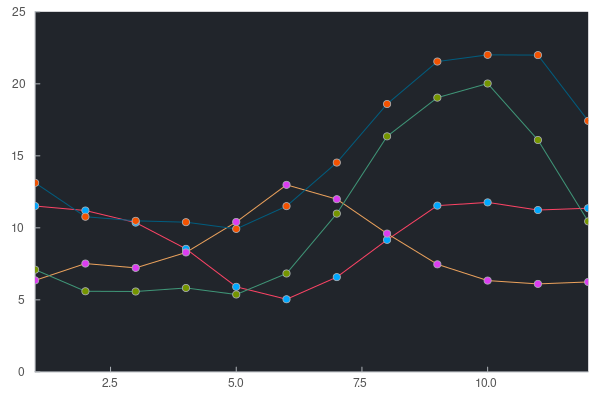

In [4]:
dfm = @chain df begin 
    @by [:region, :month] :mean_tot_sc=mean(:day_sum) :mean_patch_size=mean(:day_mean) :mean_max_size=mean(:day_max)
    @orderby :month
end

plot( dfm.month, dfm.mean_tot_sc./2025 .* 100, group =dfm.region, fontfamily="Helvetica", grid=false, 
        xlim=(1,12), ylim=(0,25), background_color=:false, face_color=:false, leg =:false)

#scatter!( dfm.month, dfm.mean_tot_sc./2025 .* 100, group = dfm.region, fill=:false)
#png("figures/test.png")

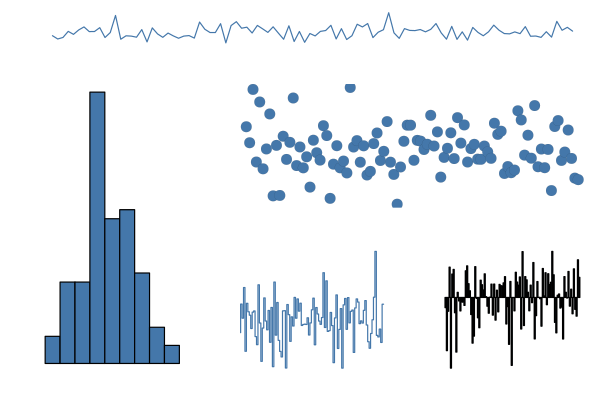

In [31]:
plot(layout = @layout([a{0.1h}; b{0.3w} [c; d e]]), randn(100, 5), 
    t = [:line :histogram :scatter :steppre :bar], leg = false, border = :none)